In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import skew
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import joblib
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("diabetes.csv")
df

df_prev = df

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
Y = np.array(df["Outcome"])

In [8]:
X = np.array(df.drop("Outcome", axis=1))

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(537, 8)

In [11]:
Y_train.reshape(X_train.shape[0],1)

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [12]:
Y_test.reshape(X_test.shape[0], 1)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [13]:
df

df = df.drop('Outcome', axis=1)

In [14]:
scaler = MinMaxScaler()
df_new_scaled = pd.DataFrame(scaler.fit_transform(df), columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

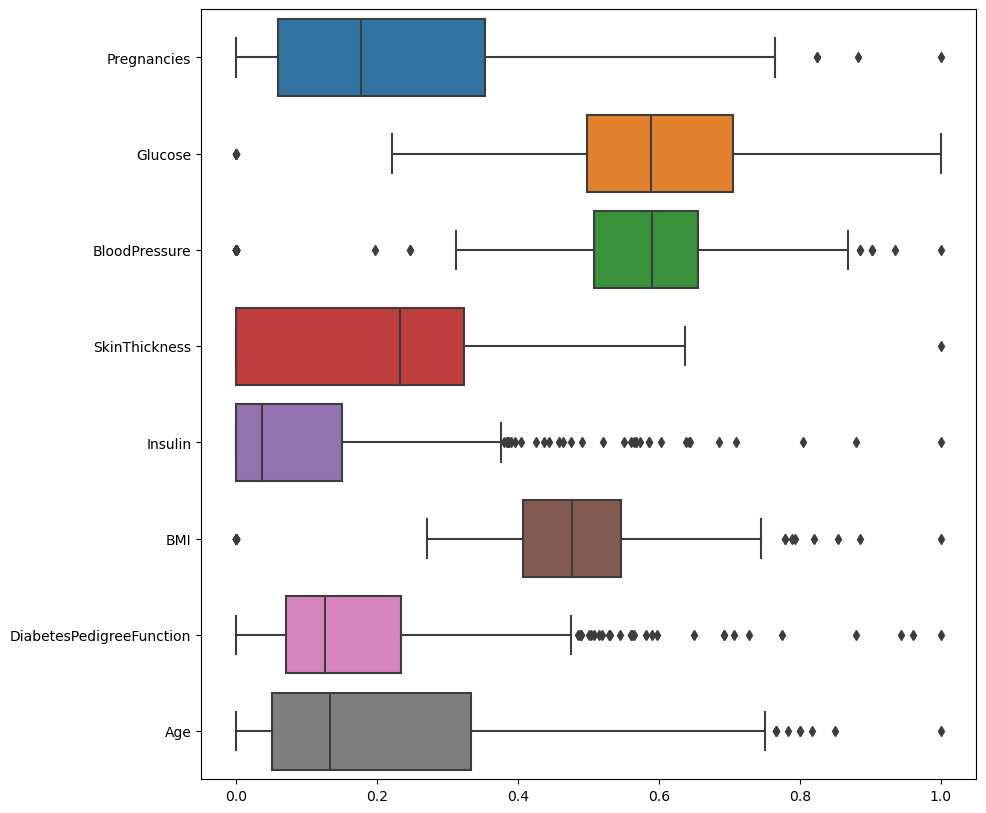

In [15]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_new_scaled, showfliers=True, orient = 'h')
plt.show()

In [16]:
Q1 = df_new_scaled['Pregnancies'].quantile(0.25)
Q3 = df_new_scaled['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_new_scaled = df_new_scaled[(df_new_scaled['Pregnancies'] >= lower_bound) & (df_new_scaled['Pregnancies'] <= upper_bound)]

In [17]:
Q1 = df_new_scaled['Glucose'].quantile(0.25)
Q3 = df_new_scaled['Glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_new_scaled = df_new_scaled[(df_new_scaled['Glucose'] >= lower_bound) & (df_new_scaled['Glucose'] <= upper_bound)]

In [18]:
Q1 = df_new_scaled['Insulin'].quantile(0.25)
Q3 = df_new_scaled['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_new_scaled = df_new_scaled[(df_new_scaled['Insulin'] >= lower_bound) & (df_new_scaled['Insulin'] <= upper_bound)]

In [19]:
Q1 = df_new_scaled['BMI'].quantile(0.25)
Q3 = df_new_scaled['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_new_scaled = df_new_scaled[(df_new_scaled['BMI'] >= lower_bound) & (df_new_scaled['BMI'] <= upper_bound)]

In [20]:
Q1 = df_new_scaled['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df_new_scaled['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_new_scaled = df_new_scaled[(df_new_scaled['DiabetesPedigreeFunction'] >= lower_bound) & (df_new_scaled['DiabetesPedigreeFunction'] <= upper_bound)]

In [21]:
Q1 = df_new_scaled['Age'].quantile(0.25)
Q3 = df_new_scaled['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_new_scaled = df_new_scaled[(df_new_scaled['Age'] >= lower_bound) & (df_new_scaled['Age'] <= upper_bound)]

In [22]:
Q1 = df_new_scaled['SkinThickness'].quantile(0.25)
Q3 = df_new_scaled['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_new_scaled = df_new_scaled[(df_new_scaled['SkinThickness'] >= lower_bound) & (df_new_scaled['SkinThickness'] <= upper_bound)]

In [23]:
Q1 = df_new_scaled['BloodPressure'].quantile(0.25)
Q3 = df_new_scaled['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_new_scaled = df_new_scaled[(df_new_scaled['BloodPressure'] >= lower_bound) & (df_new_scaled['BloodPressure'] <= upper_bound)]

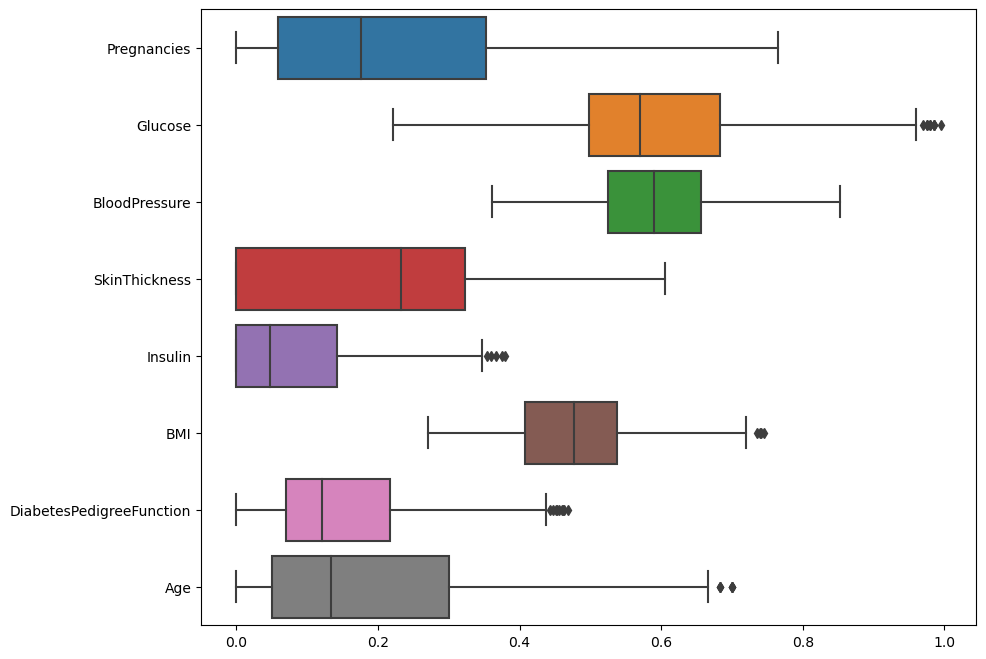

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_new_scaled, showfliers=True, orient = 'h')
plt.show()

In [25]:
df_new_scaled.shape

(626, 8)

In [26]:
Y = np.array(df_prev["Outcome"])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create a neural network classifier
clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1500, random_state=42)

# Train the model with normalized data
clf.fit(X_train_normalized, Y_train)
Y_pred_normalized = clf.predict(X_test_normalized)
accuracy_normalized = accuracy_score(Y_test, Y_pred_normalized)
print(f"Accuracy with normalized data: {accuracy_normalized}")


Accuracy with normalized data: 0.7532467532467533


In [27]:
joblib.dump(clf, 'mlp_classifier_model.pkl')

['mlp_classifier_model.pkl']

In [28]:
clf_loaded = joblib.load('mlp_classifier_model.pkl')

In [29]:
clf_loaded = joblib.load('mlp_classifier_model.pkl')
# Use the loaded model to make predictions
Y_pred_normalized_loaded = clf_loaded.predict(X_test_normalized)
accuracy_normalized_loaded = accuracy_score(Y_test, Y_pred_normalized_loaded)
print(f"Accuracy with loaded model: {accuracy_normalized_loaded}")

Accuracy with loaded model: 0.7532467532467533
